In [65]:
import pandas as pd
import numpy as np
import os
from google.colab import files

In [30]:
dates = pd.DataFrame(pd.date_range(start='1/1/1998', end='31/12/2020', freq='MS'), columns=['mstart'])
dates['mend']=dates['mstart']+pd.tseries.offsets.MonthEnd(1)

In [31]:
dates.head()

,mstart,mend
0,1998-01-01,1998-01-31
1,1998-02-01,1998-02-28
2,1998-03-01,1998-03-31
3,1998-04-01,1998-04-30
4,1998-05-01,1998-05-31


In [62]:
dates.shape[0]/12

23.0

http://www.bom.gov.au/web03/ncc/www/agcd/rainfall/totals/month/grid/0.05/history/nat/2000020120000229.grid.zip?1616257577604

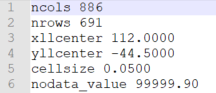

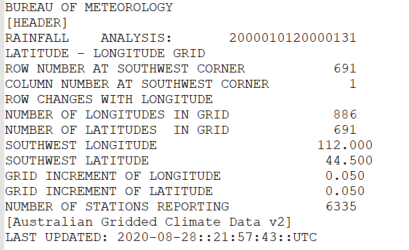

In [63]:
rainfall=np.zeros((691,886))
for index, row in dates.iterrows():
  try:
    d=row['mstart'].strftime('%Y%m%d')+row['mend'].strftime('%Y%m%d')
    filename=d+'.grid.zip'
    txtfilename='precip_total_r005_'+row['mstart'].strftime('%Y%m%d')+'_'+row['mend'].strftime('%Y%m%d')+'.txt'
    print('Processing : '+d)
    r1=os.system('wget -O "'+filename+'" "http://www.bom.gov.au/web03/ncc/www/agcd/rainfall/totals/month/grid/0.05/history/nat/'+filename+'"')
    if r1==0:
      r2=os.system('unzip '+filename)
      if r2==0:
        r3=os.system("grep '^ ' "+txtfilename+" | sed 's/^ //' > _"+txtfilename)
        if r3==0:
          temp=np.genfromtxt('_'+txtfilename, delimiter=' ')
          rainfall=rainfall+temp
  except Exception as e:
    print(str(e))
MeanRainfall=rainfall/(dates.shape[0]/12)
#Remove all files
!rm *.txt
!rm *.nc
!rm *.zip

Processing : 1998010119980131
Processing : 1998020119980228
Processing : 1998030119980331
Processing : 1998040119980430
Processing : 1998050119980531
Processing : 1998060119980630
Processing : 1998070119980731
Processing : 1998080119980831
Processing : 1998090119980930
Processing : 1998100119981031
Processing : 1998110119981130
Processing : 1998120119981231
Processing : 1999010119990131
Processing : 1999020119990228
Processing : 1999030119990331
Processing : 1999040119990430
Processing : 1999050119990531
Processing : 1999060119990630
Processing : 1999070119990731
Processing : 1999080119990831
Processing : 1999090119990930
Processing : 1999100119991031
Processing : 1999110119991130
Processing : 1999120119991231
Processing : 2000010120000131
Processing : 2000020120000229
Processing : 2000030120000331
Processing : 2000040120000430
Processing : 2000050120000531
Processing : 2000060120000630
Processing : 2000070120000731
Processing : 2000080120000831
Processing : 2000090120000930
Processing

In [64]:
MeanRainfall

array([[1267.9, 1268.3, 1268.8, ..., 2727.9, 2731.7, 2734.9],
       [1264.5, 1264.9, 1265.4, ..., 2723.4, 2727.4, 2730.6],
       [1260.4, 1260.7, 1261.3, ..., 2717.6, 2721.8, 2725. ],
       ...,
       [2423.2, 2422.3, 2420.8, ..., 1980.1, 1986.9, 1992.2],
       [2428.2, 2427. , 2425.9, ..., 1981.3, 1987.9, 1993.4],
       [2432.3, 2431.1, 2429.8, ..., 1982.2, 1989. , 1994.3]])

In [66]:
np.save('WAMeanRainfall.npy', MeanRainfall)

In [67]:
files.download("/content/WAMeanRainfall.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
data = np.load("/content/WAMeanRainfall.npy")

In [69]:
data

array([[1267.9, 1268.3, 1268.8, ..., 2727.9, 2731.7, 2734.9],
       [1264.5, 1264.9, 1265.4, ..., 2723.4, 2727.4, 2730.6],
       [1260.4, 1260.7, 1261.3, ..., 2717.6, 2721.8, 2725. ],
       ...,
       [2423.2, 2422.3, 2420.8, ..., 1980.1, 1986.9, 1992.2],
       [2428.2, 2427. , 2425.9, ..., 1981.3, 1987.9, 1993.4],
       [2432.3, 2431.1, 2429.8, ..., 1982.2, 1989. , 1994.3]])